[29000.  4000.  4000.  4000. 54000.]
[0.002 0.006 0.01  0.014 0.018]


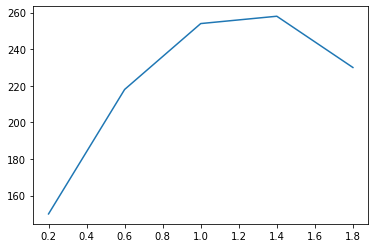

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#.......................Now we need to solve this AT=B equation using Gauss seidel ........
def Gauss_seidel(A,B):
    key=0
    n=len(A)
    x=np.ones(n) #.................#initial guess as 1 for all the x
    x_0=np.ones(n)
    epc=10**(-9)
    while(key==0):
        for i in range(0,n):
            sum1=B[i]
            for j in range(0,n):
                if(i!=j):
                    sum1= sum1-A[i][j]*x_0[j]
            x[i]=sum1/A[i][i]
            if(abs((x[i]-x_0[i])/x[i])<epc):
                key=1
            x_0[i]=x[i]
    return x
#..........................End of Gauss_seidel....................
Nx=5
Ny=5
L=0.02
H=0.5
dx=np.zeros(Nx+1)
dy=np.zeros(Nx+1)
dx[0]=L/Nx
dy[0]=L/Ny
for i in range(1,Nx+1):
    dx[i]=dx[i-1]*1
for i in range(1,Ny+1):
    dy[i]=dy[i-1]*1
cx=np.zeros(Nx+1)
cy=np.zeros(Ny+1)
node_x=np.zeros(Nx)
node_y=np.zeros(Ny)
for i in range(1,Nx+1):
    cx[i]=cx[i-1]+dx[i]
for i in range(0,Nx):
    node_x[i]=(cx[i]+cx[i+1])/2
for i in range(1,Ny+1):
    cy[i]=cy[i-1]+dy[i]
for i in range(0,Ny):
    node_y[i]=(cy[i]+cy[i+1])/2 
# [X,Y] =np.meshgrid(x,y)
for i in range(0,Nx+1):
    cx[i]=(cx[i]/cx[-1])*L
for i in range(0,Nx+1):
    cy[i]=(cy[i]/cy[-1])*H
# ..............................cx is storing face value cx[i] and node_x is giving cell center value ......

dx_1=L/Nx #### to avoid initial confusion we ignore streatching case ############ 
dy_1=L/Ny #### to avoid initial confusion we ignore streatching case ############
#..............................................
k= 0.5
q=10**6
T1=100
T2=200
Area=1
#..........................Need to create A and B matric to AT=B............. and find T using Gauss-Seidel
A=np.zeros((Nx,Nx) ,dtype=np.float32)
B=np.zeros(Nx,dtype=np.float32)
T=np.zeros(Nx,dtype=np.float32)
#.....................calculation of coefficient of A..................................
for i in range(0,Nx):
    if(i==0):
        aw=0
        ae=k*Area/dx_1
        sp=-(2*k*Area)/dx_1
        su=(q*Area*dx_1)+((2*k*Area)/dx_1)*T1
        ap=aw+ae-sp
        A[i][i] = ap
        A[i][i+1]=-ae
        #A[i][i-1]=-aw
        B[i]=su
    elif(i==(Nx-1)):
        aw=(k*Area)/dx_1
        ae=0
        sp=-(2*k*Area)/dx_1
        su=(q*Area*dx_1) + ((2*k*Area)/dx_1)*T2
        ap=aw+ae-sp
        A[i][i]=ap
        #A[i][i+1]=0
        A[i][i-1]=-aw
        B[i]=su
    else:
        aw=(k*Area)/dx_1
        ae=(k*Area)/dx_1
        sp=0
        su=(q*Area*dx_1)
        ap=aw+ae-sp
        A[i][i]=ap
        A[i][i+1]=-ae
        A[i][i-1]=-aw
        B[i]=su
print(B)
T=Gauss_seidel(A,B)

print(node_x)
plt.plot(node_x*100,T)
plt.show()
#..............For contour...............
node_xf=np.zeros(Nx)